In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
df_train = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/PLAG/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
df_test = pd.read_excel("D:/STUDIES/DATA TRAINED/DATASETS/PLAG/Flight_Ticket_Participant_Datasets/Test_set.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [47]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [49]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [50]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### DATA CLEANING

#### Given that the dataset is about Flight ticket prices, the same journey between the observed period may be recorded more than once and hence they should be removed.

In [51]:
a = list(df_train[df_train.duplicated()].index)
df_train.drop(a,axis=0,inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10459,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10460,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10461,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


#### Converting columns containing Date/Time values to 'datetime' data type

In [52]:
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'])
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'])

df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Dep_Time'] = pd.to_datetime(df_test['Dep_Time'])
df_test['Arrival_Time'] = pd.to_datetime(df_test['Arrival_Time'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Destination      10463 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10463 non-null  datetime64[ns]
 6   Arrival_Time     10463 non-null  datetime64[ns]
 7   Duration         10463 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10463 non-null  object        
 10  Price            10463 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 899.3+ KB


In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


#### Creating New features from 'Date_of_Journey' column

In [54]:
from datetime import datetime
df_train['Month']=df_train['Date_of_Journey'].dt.month
df_train['Day']=df_train['Date_of_Journey'].dt.day
df_train['Year']=df_train['Date_of_Journey'].dt.year
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-18 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-18 05:50:00,2021-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-18 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-18 18:05:00,2021-04-18 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-18 16:50:00,2021-04-18 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-04-18 19:55:00,2021-04-18 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-04-18 20:45:00,2021-04-18 23:20:00,2h 35m,non-stop,No info,4145,4,27,2019
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-04-18 08:20:00,2021-04-18 11:20:00,3h,non-stop,No info,7229,4,27,2019
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-04-18 11:30:00,2021-04-18 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019


In [55]:
from datetime import datetime
df_test['Month']=df_test['Date_of_Journey'].dt.month
df_test['Day']=df_test['Date_of_Journey'].dt.day
df_test['Year']=df_test['Date_of_Journey'].dt.year
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-04-18 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-04-18 06:20:00,2021-04-18 10:20:00,4h,1 stop,No info,12,5,2019
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-18 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,5,21,2019
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-18 08:00:00,2021-04-18 21:00:00,13h,1 stop,No info,5,21,2019
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-04-18 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info,6,24,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-04-18 20:30:00,2021-06-07 20:25:00,23h 55m,1 stop,No info,6,6,2019
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-04-18 14:20:00,2021-04-18 16:55:00,2h 35m,non-stop,No info,3,27,2019
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-18 21:50:00,2021-03-07 04:25:00,6h 35m,1 stop,No info,6,3,2019
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-18 04:00:00,2021-04-18 19:15:00,15h 15m,1 stop,No info,6,3,2019


#### Creating new features from 'Dep_Time' and 'Arrival_Time' columns

In [56]:
df_train['Dep_Hour']=df_train['Dep_Time'].dt.hour
df_train['Dep_Min']=df_train['Dep_Time'].dt.minute
df_train['Arr_hour']=df_train['Arrival_Time'].dt.hour
df_train['Arr_min']=df_train['Arrival_Time'].dt.minute
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_Hour,Dep_Min,Arr_hour,Arr_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-18 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-18 05:50:00,2021-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-18 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-18 18:05:00,2021-04-18 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-18 16:50:00,2021-04-18 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-04-18 19:55:00,2021-04-18 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-04-18 20:45:00,2021-04-18 23:20:00,2h 35m,non-stop,No info,4145,4,27,2019,20,45,23,20
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-04-18 08:20:00,2021-04-18 11:20:00,3h,non-stop,No info,7229,4,27,2019,8,20,11,20
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-04-18 11:30:00,2021-04-18 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [57]:
df_test['Dep_Hour']=df_test['Dep_Time'].dt.hour
df_test['Dep_Min']=df_test['Dep_Time'].dt.minute
df_test['Arr_hour']=df_test['Arrival_Time'].dt.hour
df_test['Arr_min']=df_test['Arrival_Time'].dt.minute
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Year,Dep_Hour,Dep_Min,Arr_hour,Arr_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-04-18 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-04-18 06:20:00,2021-04-18 10:20:00,4h,1 stop,No info,12,5,2019,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-18 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,5,21,2019,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-18 08:00:00,2021-04-18 21:00:00,13h,1 stop,No info,5,21,2019,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-04-18 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info,6,24,2019,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-04-18 20:30:00,2021-06-07 20:25:00,23h 55m,1 stop,No info,6,6,2019,20,30,20,25
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-04-18 14:20:00,2021-04-18 16:55:00,2h 35m,non-stop,No info,3,27,2019,14,20,16,55
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-18 21:50:00,2021-03-07 04:25:00,6h 35m,1 stop,No info,6,3,2019,21,50,4,25
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-18 04:00:00,2021-04-18 19:15:00,15h 15m,1 stop,No info,6,3,2019,4,0,19,15


#### Converting 'Duration' column to minutes

In [58]:
df_train['Duration_hr'] = df_train['Duration'].str.split('h').str[0]
df_train['Duration_min'] = df_train['Duration'].str.split('h').str[1]

In [62]:
# Moving minutes to 'Duration_min' column
df_train['Duration_min'] = df_train.apply( lambda row: row['Duration_hr'] if ('m' in row['Duration_hr'])  else row['Duration_min'],axis=1)

# Assigning 0 to 'Duration_hr' column where minute value is present
df_train['Duration_hr'] = df_train.apply( lambda row: '0' if ('m' in row['Duration_hr'])  else row['Duration_hr'],axis=1)

# Converting 'Duration_hr' column to 'int' datatype
df_train['Duration_hr'] = df_train['Duration_hr'].astype('int')

# Replacing 'm' by '' in 'Duration_min' column
df_train['Duration_min'] = df_train['Duration_min'].str.replace('m','')

# Assigning 0 to 'Duration_min' column where minute value is not present
df_train['Duration_min'].replace('','0',inplace=True)

# Converting 'Duration_min' column to 'int' datatype
df_train['Duration_min'] = df_train['Duration_min'].astype('int')

# Converting 'Duration' column to minutes
df_train['Duration'] = (df_train['Duration_hr']*60) + df_train['Duration_min']
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_Hour,Dep_Min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-04-18 22:20:00,2021-03-22 01:10:00,170,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-04-18 05:50:00,2021-04-18 13:15:00,445,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-04-18 09:25:00,2021-06-10 04:25:00,1140,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-04-18 18:05:00,2021-04-18 23:30:00,325,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-04-18 16:50:00,2021-04-18 21:35:00,285,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2021-04-18 19:55:00,2021-04-18 22:25:00,150,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10459,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2021-04-18 20:45:00,2021-04-18 23:20:00,155,non-stop,No info,4145,4,27,2019,20,45,23,20,2,35
10460,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2021-04-18 08:20:00,2021-04-18 11:20:00,180,non-stop,No info,7229,4,27,2019,8,20,11,20,3,0
10461,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2021-04-18 11:30:00,2021-04-18 14:10:00,160,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40


In [63]:
df_test['Duration_hr'] = df_test['Duration'].str.split('h').str[0]
df_test['Duration_min'] = df_test['Duration'].str.split('h').str[1]

In [64]:
# Moving minutes to 'Duration_min' column
df_test['Duration_min'] = df_test.apply( lambda row: row['Duration_hr'] if ('m' in row['Duration_hr'])  else row['Duration_min'],axis=1)

# Assigning 0 to 'Duration_hr' column where minute value is present
df_test['Duration_hr'] = df_test.apply( lambda row: '0' if ('m' in row['Duration_hr'])  else row['Duration_hr'],axis=1)

# Converting 'Duration_hr' column to 'int' datatype
df_test['Duration_hr'] = df_test['Duration_hr'].astype('int')

# Replacing 'm' by '' in 'Duration_min' column
df_test['Duration_min'] = df_test['Duration_min'].str.replace('m','')

# Assigning 0 to 'Duration_min' column where minute value is not present
df_test['Duration_min'].replace('','0',inplace=True)

# Converting 'Duration_min' column to 'int' datatype
df_test['Duration_min'] = df_test['Duration_min'].astype('int')

# Converting 'Duration' column to minutes
df_test['Duration'] = (df_test['Duration_hr']*60) + df_test['Duration_min']
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day,Year,Dep_Hour,Dep_Min,Arr_hour,Arr_min,Duration_hr,Duration_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-04-18 17:30:00,2021-06-07 04:25:00,655,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-04-18 06:20:00,2021-04-18 10:20:00,240,1 stop,No info,12,5,2019,6,20,10,20,4,0
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-18 19:15:00,2021-05-22 19:00:00,1425,1 stop,In-flight meal not included,5,21,2019,19,15,19,0,23,45
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-04-18 08:00:00,2021-04-18 21:00:00,780,1 stop,No info,5,21,2019,8,0,21,0,13,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-04-18 23:55:00,2021-06-25 02:45:00,170,non-stop,No info,6,24,2019,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-04-18 20:30:00,2021-06-07 20:25:00,1435,1 stop,No info,6,6,2019,20,30,20,25,23,55
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-04-18 14:20:00,2021-04-18 16:55:00,155,non-stop,No info,3,27,2019,14,20,16,55,2,35
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-18 21:50:00,2021-03-07 04:25:00,395,1 stop,No info,6,3,2019,21,50,4,25,6,35
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-04-18 04:00:00,2021-04-18 19:15:00,915,1 stop,No info,6,3,2019,4,0,19,15,15,15


#### Total_stops

In [65]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [66]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

#### Additional Info

In [67]:
df_train['Additional_Info'].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [68]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

In [69]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

#### Dropping Unnecessary Columns

In [71]:
df_train.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration_hr', 'Duration_min'],axis=1,inplace=True)
df_test.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration_hr', 'Duration_min'],axis=1,inplace=True)

### EDA

### UNIVARIATE ANALYSIS

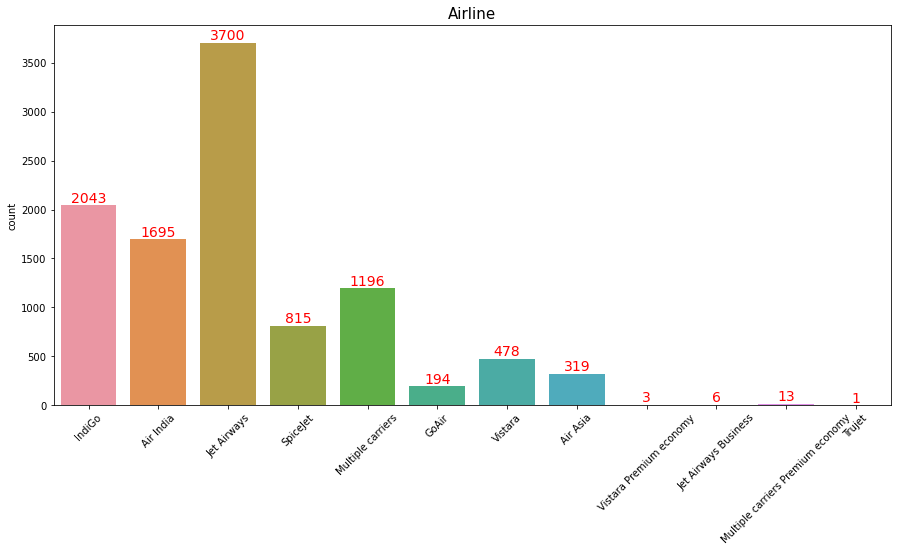

In [78]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Airline'])
ax.set_title('Airline',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* Jet Airways is the most commonly used Airline.

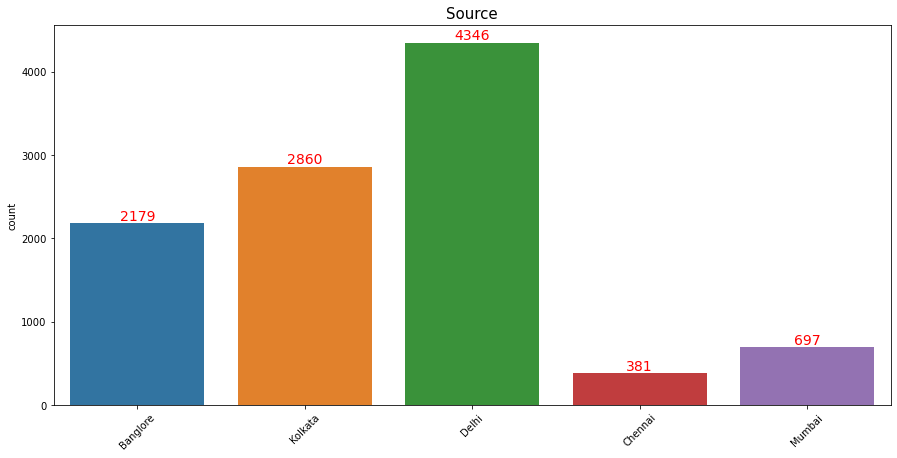

In [79]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Source'])
ax.set_title('Source',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* 'Delhi' is the most common source that people travel from.

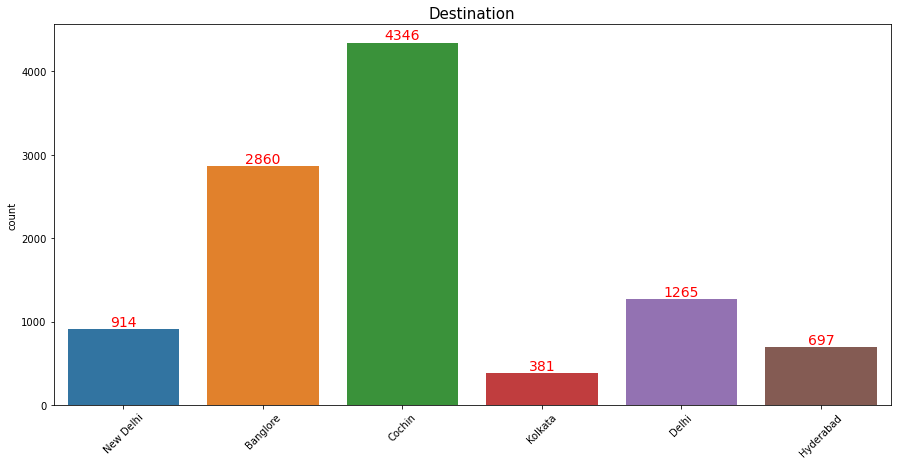

In [80]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Destination'])
ax.set_title('Destination',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* 'Cochin' is the most common Destination that people travel to.

In [82]:
df_train['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → CCU → HYD             1
BOM → NDC → HYD             1
CCU → RPR → HYD → BLR       1
BOM → DED → DEL → HYD       1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

* There are 128 distinct routes and 'DEL -- BOM -- COK' is the most common route among them

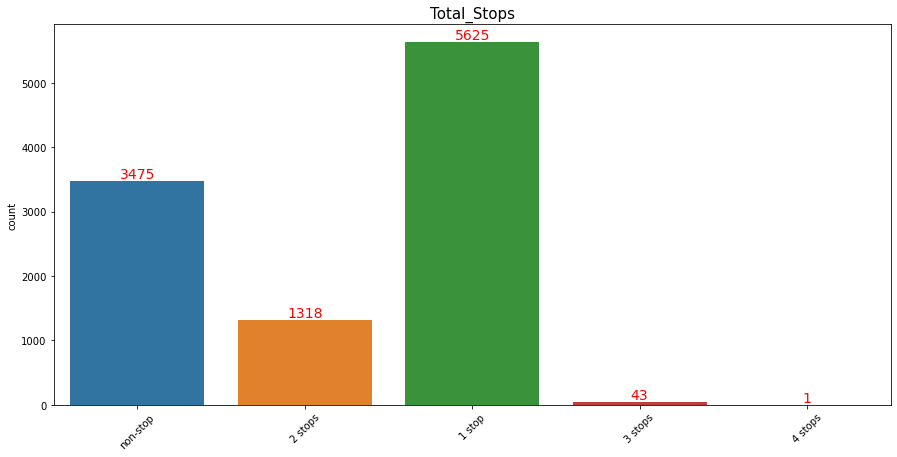

In [83]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Total_Stops'])
ax.set_title('Total_Stops',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* Most Flights make 1 stop before arriving at the destination

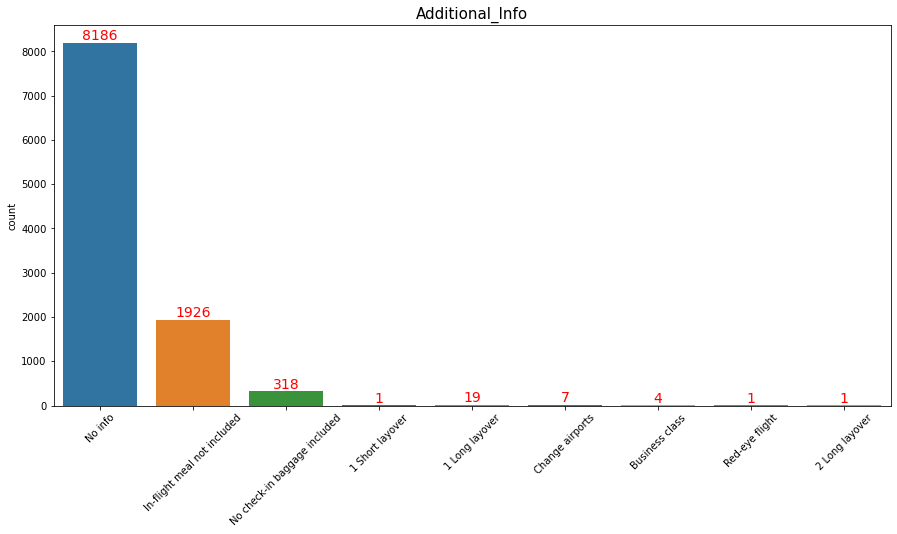

In [84]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Additional_Info'])
ax.set_title('Additional_Info',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

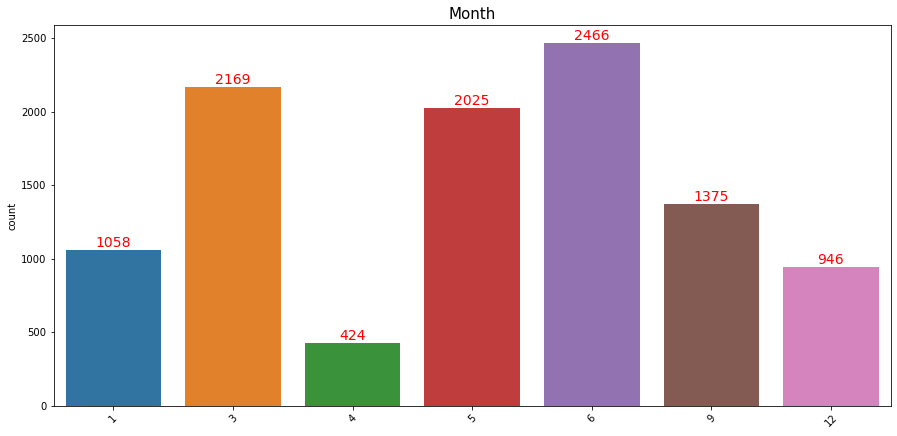

In [85]:
plt.figure(figsize=(15,7))
ax = sns.countplot(df_train['Month'])
ax.set_title('Month',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')

* The dataset contains majority of entries from 'June' Month

Text(0.5, 1.0, 'Duration')

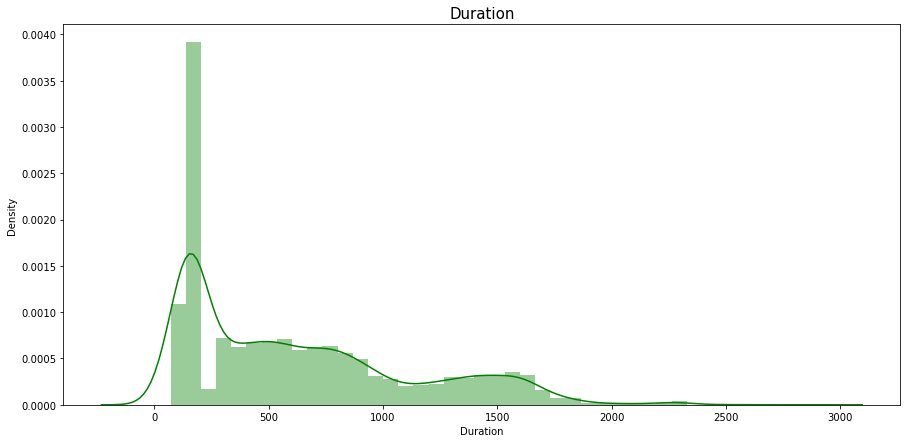

In [87]:
plt.figure(figsize=(15,7))
ax = sns.distplot(df_train['Duration'], color ='green')
ax.set_title('Duration',fontsize=15)

* The distribution is right skewed.
* Most flights have a flight time of less than 500 mins.

Text(0.5, 1.0, 'Price')

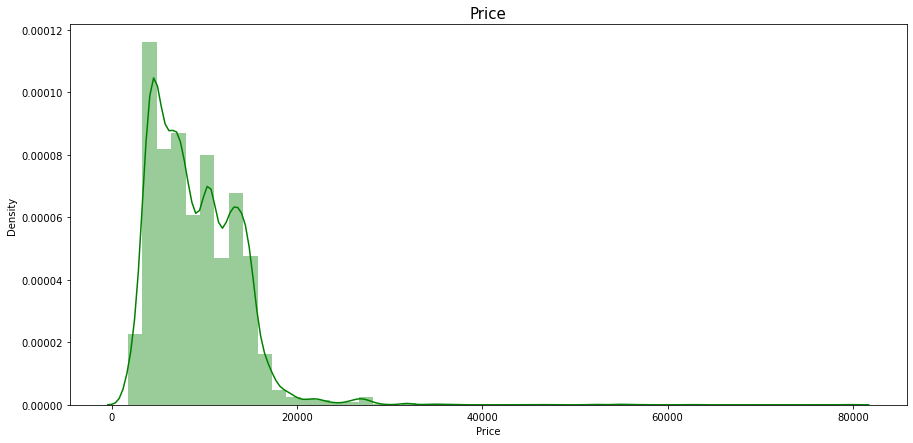

In [89]:
plt.figure(figsize=(15,7))
ax = sns.distplot(df_train['Price'], color ='green')
ax.set_title('Price',fontsize=15)

* Most flight trips Cost less than 20000.
* The distribution is multi modal and right skewed.

### OUTLIER REMOVAL

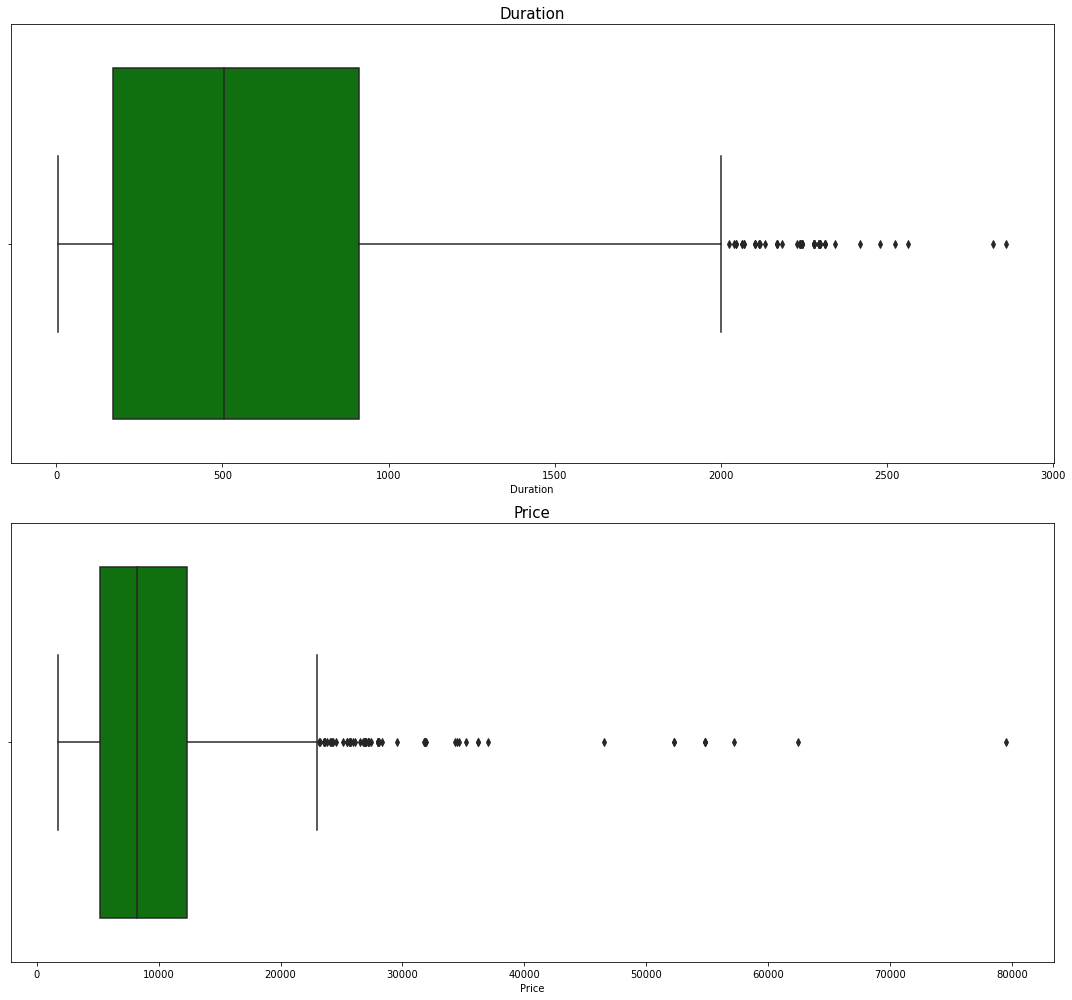

In [91]:
plt.figure(figsize=(15,14))
plt.subplot(2,1,1)
ax = sns.boxplot(df_train['Duration'], orient='h', color ='green')
ax.set_title('Duration',fontsize=15)
plt.subplot(2,1,2)
ax = sns.boxplot(df_train['Price'], orient='h', color ='green')
ax.set_title('Price',fontsize=15)
plt.tight_layout()

* Both Columns contain Higher Outliers

In [92]:
temp_df = df_train[['Price','Duration']]
threshold = 3
temp_df

,Price,Duration
0,3897,170
1,7662,445
2,13882,1140
3,6218,325
4,13302,285
...,...,...
10458,4107,150
10459,4145,155
10460,7229,180
10461,12648,160


In [93]:
from scipy.stats import zscore
z = np.abs(zscore(temp_df))
np.where(z>threshold)

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
          784,   825,   924,   935,   945,   958,   965,   968,   974,
         1065,  1111,  1194,  1244,  1339,  1344,  1420,  1438,  1462,
         1474,  1492,  1547,  1625,  1650,  1653,  1778,  1784,  1797,
         1909,  2044,  2087,  2096,  2160,  2483,  2540,  2543,  2604,
         2621,  2627,  2640,  2677,  2701,  2904,  3010,  3088,  3231,
         3372,  3505,  3667,  3755,  3780,  3929,  3974,  4008,  4078,
         4418,  4476,  4606,  4627,  4779,  4960,  5080,  5312,  5378,
         5451,  5597,  5636,  5636,  5645,  5646,  5654,  5673,  5680,
         5717,  5789,  5864,  5884,  5916,  5988,  6014,  6240,  6247,
         6332,  6399,  6497,  6509,  6526,  6902,  7096,  7138,  7210,
         7233,  7254,  7259,  7280,  7438,  7454,  7455,  7511,  7516,
         7609,  7620,  7650,  7769,  7795,  7799,  7910,  7968,  8013,
         8039,  8285,  8288,  8326,  8345,  8409,  8467,  8470,  8489,
      

In [94]:
df_new = df_train[(z<threshold).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_Hour,Dep_Min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,4,2019,19,55,22,25
10459,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,4,27,2019,20,45,23,20
10460,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,4,27,2019,8,20,11,20
10461,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,1,3,2019,11,30,14,10


In [95]:
#Percentage of data lost
((len(df_train)-len(df_new))/len(df_train))*100

1.4909681735639875

Percentage of data lost is well less than 5%, therefore we will proceed with this method

In [96]:
df_new.reset_index(inplace = True,drop=True)
df_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_Hour,Dep_Min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10302,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,4,2019,19,55,22,25
10303,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,4,27,2019,20,45,23,20
10304,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,4,27,2019,8,20,11,20
10305,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,1,3,2019,11,30,14,10


### BIVARIATE ANALYSIS

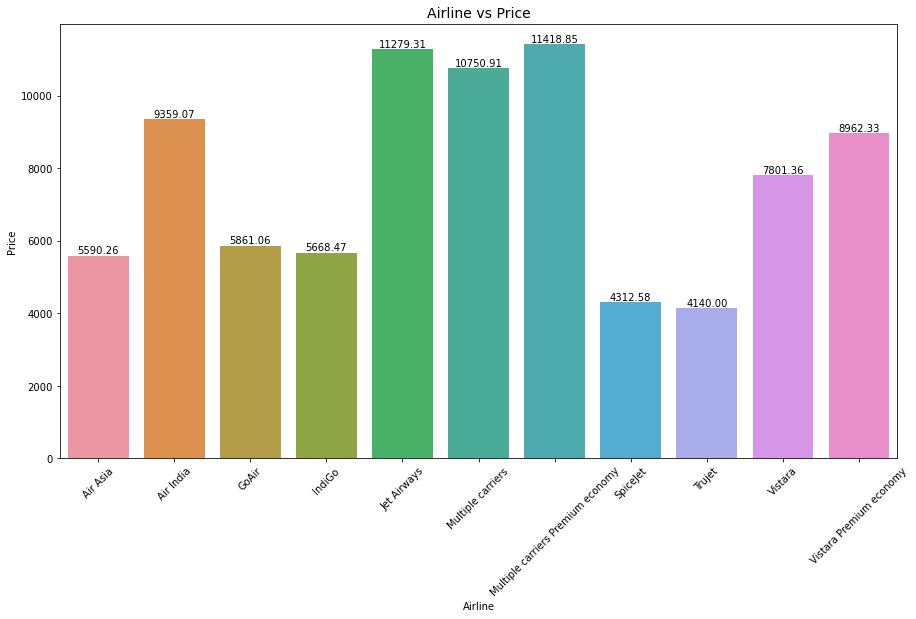

In [99]:
plt.figure(figsize=(15,8))
df_grp1 = df_new[['Airline','Price']].groupby('Airline').mean()
ax = sns.barplot(x=df_grp1.index,y=df_grp1['Price'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Airline vs Price',fontsize=14)
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* 'Jet Airways' and 'Multiple carriers Premium economy' charge the highest price

In [73]:
df_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_Hour,Dep_Min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,4,2019,19,55,22,25
10459,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,4,27,2019,20,45,23,20
10460,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,4,27,2019,8,20,11,20
10461,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,1,3,2019,11,30,14,10
